<a href="https://colab.research.google.com/github/ilman79/Project_dicoding/blob/main/Project_DataAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-commerce-public-dataset
- Nama: Ilman Gifari
- Email: gifariilman79@gmail.com
- Id Dicoding: ilman30

## Menentukan Pertanyaan Bisnis


- Apakah terjadi penurunan atau kenaikan penjualan ?
- Transaksi yang sering digunakan untuk berbelanja ?
- Mana sajakah barang yang rattingnya bagus dan jelek ?
- Barang apa saja yang sering diminati dan tidak ?
- Wilayah mana saja yang sering berbelanja ?
- Seller mana yang penjualannya terbanyak ?

## Menyiapkan semua library yang dibuthkan

In [1]:
!pip install gdown
import gdown

# Tautan unduhan langsung ke file Google Drive
url = 'https://drive.google.com/uc?export=download&id=1ZC5fFb7lr36NzWkkbZMiHp6NkUXFmY97'

# Nama file tujuan
output = '/content/dataset.zip'  # Sesuaikan dengan nama file yang diinginkan

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1ZC5fFb7lr36NzWkkbZMiHp6NkUXFmY97
To: /content/dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 95.0MB/s]


'/content/dataset.zip'

In [2]:
import zipfile

# Misalkan dataset berada dalam file zip bernama dataset.zip
zip_path = '/content/dataset.zip'
extracted_path = '/content/dataset'  # Ganti dengan direktori tujuan ekstraksi
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data


In [4]:
customers_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/customers_dataset.csv", delimiter=",")
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
geolocation_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/geolocation_dataset.csv", delimiter=",")
geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [6]:
order_items_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_items_dataset.csv", delimiter=",")
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
order_payments_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_payments_dataset.csv", delimiter=",")
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
order_reviews_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_reviews_dataset.csv", delimiter=",")
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [9]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [10]:
orders_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/orders_dataset.csv", delimiter=",")
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
product_category_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/product_category_name_translation.csv", delimiter=",")
product_category_dataset

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [13]:
product_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/products_dataset.csv", delimiter=",")
product_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [14]:
sellers_dataset = df = pd.read_csv("/content/dataset/E-Commerce Public Dataset/sellers_dataset.csv", delimiter=",")
sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [15]:
#menggabungkan seluruh dataset order
dataset_penjualan = orders_dataset.merge(order_reviews_dataset, on='order_id', how='inner').merge(order_payments_dataset, on='order_id', how='inner').merge(order_items_dataset, on='order_id', how='inner')

In [16]:
dataset_penjualan

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,...,1,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,...,1,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,1,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,1,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


### Assessing Data Penjualan

In [17]:
dataset_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   review_id                      117329 non-null  object 
 9   review_score                   117329 non-null  int64  
 10  review_comment_title           13892 non-null   object 
 11  review_comment_message         49679 non-null   object 
 12  review_creation_date          

In [18]:
# Mengubah tipe data kolom 'tanggal_str' menjadi tipe data tanggal (date)
dataset_penjualan['order_delivered_carrier_date'] = pd.to_datetime(dataset_penjualan['order_delivered_carrier_date'])
dataset_penjualan['order_delivered_customer_date'] = pd.to_datetime(dataset_penjualan['order_delivered_customer_date'])
dataset_penjualan['order_purchase_timestamp'] = pd.to_datetime(dataset_penjualan['order_purchase_timestamp'])
dataset_penjualan['order_approved_at'] = pd.to_datetime(dataset_penjualan['order_approved_at'])
dataset_penjualan['order_estimated_delivery_date'] = pd.to_datetime(dataset_penjualan['order_estimated_delivery_date'])
dataset_penjualan['shipping_limit_date'] = pd.to_datetime(dataset_penjualan['shipping_limit_date'])

print(dataset_penjualan.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
order_item_id                             int64
product_id                               object
seller_id                               

In [19]:
dataset_penjualan.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
dtype: int64

In [20]:
dataset_penjualan.duplicated().sum()

0

In [21]:
dataset_penjualan.describe()

,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,4.031467,1.094452,2.940151,172.062565,1.194121,120.524349,20.027514
std,1.387927,0.731174,2.775370,265.388194,0.684225,182.944843,15.828077
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000
25%,4.000000,1.000000,1.000000,60.750000,1.000000,39.900000,13.080000
50%,5.000000,1.000000,2.000000,108.100000,1.000000,74.900000,16.280000
75%,5.000000,1.000000,4.000000,189.060000,1.000000,134.900000,21.180000
max,5.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000


In [22]:
order_payments_dataset.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Assessing Data costemers

In [23]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [25]:
customers_dataset.duplicated().sum()

0

In [26]:
customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Assessing Data Product

In [27]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
product_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
product_dataset.duplicated().sum()

0

In [30]:
product_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data

### Cleaning data penjualan

Dikarenakan ada beberapa data yang NAN dan NaT maka kita akan lakukan cleaning pada data dan merapihkan data tersebut. Diantaranya data penjualan pada column :

1.   order_approved_at
2.   order_delivered_carrier_date
3.   order_delivered_customer_date
4.   review_comment_title
5.   review_comment_message



In [31]:
dataset_dropna_1 = dataset_penjualan[dataset_penjualan.order_approved_at.isna()]
dataset_dropna_2 = dataset_penjualan[dataset_penjualan.order_delivered_carrier_date.isna()]
dataset_dropna_3 = dataset_penjualan[dataset_penjualan.order_delivered_customer_date.isna()]

In [32]:
dataset_penjualan[dataset_penjualan.review_comment_title.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,1,credit_card,1,72.20,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4,...,1,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5,...,1,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,1,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,1,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [33]:
dataset_penjualan.review_comment_title.fillna(value="Not review Comment", inplace=True)
dataset_penjualan.review_comment_title.isna().sum()

0

In [34]:
dataset_penjualan[dataset_penjualan.review_comment_message.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,1,credit_card,1,28.62,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,89b738e70a1ce346db29a20fb2910161,4,...,1,credit_card,6,175.26,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,07d67dd06ed5f88bef11ef6b464e79ae,5,...,1,credit_card,3,75.16,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17
10,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1,...,1,boleto,1,35.95,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117320,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e8995c053d3db2d9c07407efe7de52dd,5,...,2,voucher,1,250.00,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,19.43
117321,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e8995c053d3db2d9c07407efe7de52dd,5,...,1,credit_card,5,139.43,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,19.43
117322,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,96e8f371a3983122b739944537e15525,5,...,1,credit_card,3,155.99,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,16.09
117323,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5,...,1,credit_card,3,85.08,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08


In [35]:
dataset_penjualan.review_comment_message.fillna(value="Not review Comment", inplace=True)
dataset_penjualan.review_comment_message.isna().sum()

0

In [36]:
dataset_penjualan.dropna(axis=0, inplace=True)

In [37]:
dataset_penjualan.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

Sudah dilakukan cleaning pada masing masing data yang NAN sehingga data tersebut dapat digunakan lebih lanjut dalam proses analis

In [38]:
from datetime import datetime
sampai = dataset_penjualan.loc[dataset_penjualan['order_delivered_customer_date'].apply(lambda x: isinstance(x, datetime)), 'order_delivered_customer_date']
dikirim = dataset_penjualan.loc[dataset_penjualan['order_delivered_carrier_date'].apply(lambda x: isinstance(x, datetime)), 'order_delivered_carrier_date']
dataset_penjualan["delivery_time"] = (sampai - dikirim).dt.days
dataset_penjualan["delivery_time"]

0          6
1          6
2          6
3         12
4          9
          ..
117324    20
117325    23
117326    13
117327    13
117328     6
Name: delivery_time, Length: 114842, dtype: int64

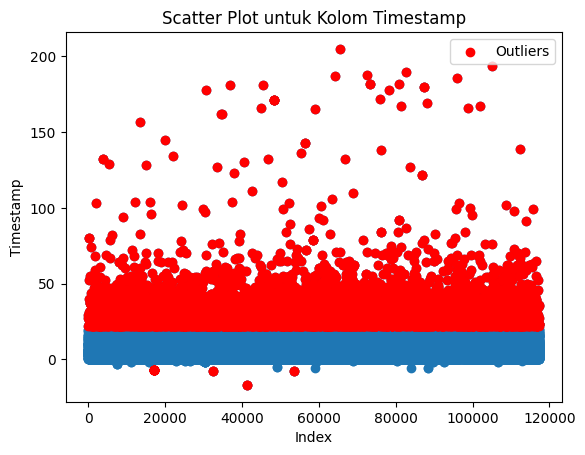

In [39]:
# Hitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = dataset_penjualan['delivery_time'].quantile(0.25)
Q3 = dataset_penjualan['delivery_time'].quantile(0.75)

# Hitung rentang interkuartil (IQR)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Cek outlier
outliers = dataset_penjualan[(dataset_penjualan['delivery_time']< lower_bound) | (dataset_penjualan['delivery_time'] > upper_bound)]
plt.scatter(dataset_penjualan.index, dataset_penjualan['delivery_time'])
plt.scatter(outliers.index, outliers['delivery_time'], color='red', label='Outliers')
plt.title('Scatter Plot untuk Kolom Timestamp')
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.legend()
plt.show()


In [40]:
outliear_data = dataset_penjualan[dataset_penjualan.delivery_time < 0]
outliear_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delivery_time
7534,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,f02d53807b5139530efbbcff78e224d5,3,...,boleto,1,304.56,1,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,-3
7535,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,f02d53807b5139530efbbcff78e224d5,3,...,boleto,1,304.56,2,b114bf337c0626166abe574eee9e3f32,7c67e1448b00f6e969d365cea6b010ab,2017-08-01 06:43:14,169.94,74.65,-3
7536,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,f02d53807b5139530efbbcff78e224d5,3,...,boleto,1,304.56,3,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,-3
11237,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,78d8077c10c6b377650a5dd2de99033d,1,...,credit_card,7,111.24,1,09ffd5e043f6d44ca166be7f91dab462,31344c16881c08a8a72c6d2eb29918c1,2017-07-06 21:10:20,39.90,2.49,-2
11238,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,78d8077c10c6b377650a5dd2de99033d,1,...,credit_card,7,111.24,2,eff955ba97941dc6837a770367d66944,1554a68530182680ad5c8b042c3ab563,2017-07-06 21:10:20,43.90,24.95,-2
15834,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,5bb72b5c6644e0372d8df57db897594d,3,...,boleto,1,140.06,1,dae7d137a7eb1a685e48c83f7952b388,30a2f535bb48308f991d0b9ad4a8c4bb,2017-07-24 06:03:50,49.90,10.40,-2
15835,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,5bb72b5c6644e0372d8df57db897594d,3,...,boleto,1,140.06,2,77b61edc47d5dda4e6fb3568962d3e63,066a6914e1ebf3ea95a216c73a986b91,2017-07-24 06:03:50,74.90,4.86,-2
17000,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,5ac328e3b52792622d2091591e678cdc,2,...,voucher,1,142.75,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-27 11:45:11,119.90,23.42,-7
17001,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,5ac328e3b52792622d2091591e678cdc,2,...,voucher,1,142.75,2,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-27 11:45:11,119.90,23.42,-7
17002,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,5ac328e3b52792622d2091591e678cdc,2,...,voucher,1,142.75,3,42155695adbe665066ad812855fe523a,e9d99831abad74458942f21e16f33f92,2017-07-27 11:45:11,38.99,4.44,-7


In [41]:
dataset_penjualan_baru = dataset_penjualan[dataset_penjualan.delivery_time > 0]
dataset_penjualan_baru

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,12
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4,...,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,20
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5,...,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,23
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,13
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,13


In [42]:
dataset_penjualan_baru.describe()

,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,delivery_time
count,111508.000000,111508.000000,111508.000000,111508.000000,111508.000000,111508.000000,111508.000000,111508.000000
mean,4.073439,1.092011,2.949627,172.048752,1.193125,120.341997,20.223315,8.974253
std,1.351401,0.693588,2.781399,265.227967,0.685250,181.970648,15.806613,8.530762
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,61.280000,1.000000,39.900000,13.430000,4.000000
50%,5.000000,1.000000,2.000000,108.685000,1.000000,74.990000,16.460000,7.000000
75%,5.000000,1.000000,4.000000,189.152500,1.000000,134.555000,21.340000,12.000000
max,5.000000,26.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,205.000000


### Cleaning Data Product

Pada data product terdapat missing value yang harus dicleaning dan diolah lebih serius untuk memperoleh banyak informasi dari data tesebut. Adapun beberapa data yang akan dicleaning yaitu

1.   product_category_name
2.   product_name_lenght           
3.   product_description_lenght    
4.   product_photos_qty            
5.   product_weight_g
6.   product_length_cm              
7.   product_height_cm
8.   product_width_cm

In [43]:
product_dataset[product_dataset.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [44]:
product_dataset.product_category_name.fillna(value='No Category', inplace=True)
product_dataset.product_category_name.isna().sum()

0

In [45]:
product_dataset[product_dataset.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,No Category,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,No Category,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,No Category,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,No Category,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,No Category,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,No Category,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,No Category,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,No Category,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,No Category,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [46]:
product_dataset.product_name_lenght.fillna(value='No Length Name', inplace=True)
product_dataset.product_name_lenght.isna().sum()

0

In [47]:
product_dataset[product_dataset.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,No Category,No Length Name,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,No Category,No Length Name,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,No Category,No Length Name,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,No Category,No Length Name,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,No Category,No Length Name,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,No Category,No Length Name,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,No Category,No Length Name,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,No Category,No Length Name,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,No Category,No Length Name,NaN,NaN,1300.0,45.0,16.0,45.0


In [48]:
product_dataset.product_description_lenght.fillna(value='No Length decs', inplace=True)
product_dataset.product_description_lenght.isna().sum()

0

In [49]:
product_dataset[product_dataset.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,No Category,No Length Name,No Length decs,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,No Category,No Length Name,No Length decs,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,No Category,No Length Name,No Length decs,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,No Category,No Length Name,No Length decs,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,No Category,No Length Name,No Length decs,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,No Category,No Length Name,No Length decs,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,No Category,No Length Name,No Length decs,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,No Category,No Length Name,No Length decs,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,No Category,No Length Name,No Length decs,NaN,1300.0,45.0,16.0,45.0


In [50]:
product_dataset.product_photos_qty.fillna(value='No photos', inplace=True)
product_dataset.product_photos_qty.isna().sum()

0

In [51]:
product_dataset[product_dataset.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,No Category,No Length Name,No Length decs,No photos,NaN,NaN,NaN,NaN


In [52]:
product_dataset['product_weight_g'].fillna(np.mean(product_dataset['product_weight_g']), inplace=True)
product_dataset['product_length_cm'].fillna(np.mean(product_dataset['product_length_cm']), inplace=True)
product_dataset['product_height_cm'].fillna(np.mean(product_dataset['product_height_cm']), inplace=True)
product_dataset['product_width_cm'].fillna(np.mean(product_dataset['product_width_cm']), inplace=True)

## Exploratory Data Analysis (EDA)



### Explore Penjualan

In [53]:
dataset_penjualan_baru

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,6
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,12
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4,...,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,20
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5,...,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,23
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,13
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,13


In [54]:
dataset_penjualan_baru.customer_id.nunique()

93120

In [55]:
dataset_penjualan_baru.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered    93114
canceled         6
Name: customer_id, dtype: int64

In [56]:
dataset_penjualan_baru.groupby(by="review_score").customer_id.nunique().sort_values(ascending=False)

review_score
5    54958
4    18484
1     9227
3     7764
2     2874
Name: customer_id, dtype: int64

In [57]:
dataset_penjualan_baru.groupby(dataset_penjualan_baru['order_approved_at'].dt.month).customer_id.nunique().sort_values(ascending=False)

order_approved_at
8     10265
5     10228
7      9566
3      9378
6      8961
4      8630
2      7908
1      7404
11     6879
12     5404
10     4519
9      3978
Name: customer_id, dtype: int64

In [58]:
dataset_penjualan_baru.groupby(dataset_penjualan_baru['order_approved_at'].dt.year).customer_id.nunique().sort_values(ascending=False)

order_approved_at
2018    51206
2017    41664
2016      250
Name: customer_id, dtype: int64

In [59]:
result_month = dataset_penjualan_baru.groupby(dataset_penjualan_baru['order_approved_at'].dt.month).agg({
    "payment_value": ["max", "min", "mean","sum"]
})

# Urutkan hasil berdasarkan kolom "mean" (rata-rata harga) secara menurun (ascending=False)
result_month.sort_values(by=("payment_value", "sum"), ascending=False)


payment_value                              
                            max   min        mean         sum
order_approved_at                                            
5                       6726.66  0.00  175.752111  2167550.79
8                       4513.32  0.05  163.335391  1976358.23
7                       7274.88  0.01  168.718331  1919845.89
3                       4175.26  0.13  169.400475  1910667.96
4                       4950.34  0.01  179.166338  1833409.14
6                       4681.78  0.00  170.403531  1826214.64
2                       6929.31  0.23  164.879298  1562231.35
11                      6081.54  0.03  177.739030  1493896.55
1                       3826.80  0.00  167.248426  1484664.28
10                     13664.08  0.00  204.796767  1134983.68
12                      2734.66  0.17  158.758098  1006526.34
9                       2154.82  0.23  179.880570   868463.39

In [60]:
result_year = dataset_penjualan_baru.groupby(dataset_penjualan_baru['order_approved_at'].dt.year).agg({
    "payment_value": ["max", "min", "mean","sum"]
})

# Urutkan hasil berdasarkan kolom "mean" (rata-rata harga) secara menurun (ascending=False)
result_year.sort_values(by=("payment_value", "sum"), ascending=False)

payment_value                               
                            max   min        mean          sum
order_approved_at                                             
2018                    7274.88  0.00  173.645219  10560581.26
2017                   13664.08  0.00  170.039553   8565742.47
2016                    1423.55  0.74  185.090222     58488.51

In [61]:
result_payment = dataset_penjualan_baru.groupby('payment_type').agg({
    "payment_value": ["max", "min", "mean", "sum"]
})

# Urutkan hasil berdasarkan kolom "mean" (rata-rata harga) secara menurun (ascending=False)
result_payment.sort_values(by=("payment_value", "sum"), ascending=False)


payment_value                                
                       max    min        mean          sum
payment_type                                              
credit_card       13664.08   0.01  179.049275  14731637.20
boleto             7274.88  11.62  176.645082   3833198.27
voucher            1839.05   0.00   64.530347    383632.91
debit_card         4445.50  13.38  149.018827    236343.86

In [62]:
dataset_penjualan_baru.groupby(by="payment_installments").customer_id.nunique().sort_values(ascending=False)

payment_installments
1     45753
2     11600
3      9825
4      6702
10     4978
5      4916
8      4016
6      3706
7      1525
9       592
12      126
15       69
18       27
11       21
24       18
13       15
20       15
14       14
17        7
16        5
21        3
0         2
22        1
23        1
Name: customer_id, dtype: int64

### Explore data customers

In [63]:
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [64]:
customers_dataset.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [65]:
customers_dataset.groupby(by="customer_state").customer_city.nunique().sort_values(ascending=False)

customer_state
MG    745
SP    629
RS    379
PR    364
BA    353
SC    240
GO    178
CE    161
PE    152
RJ    149
MA    122
MT    101
ES     95
PB     92
RN     90
PA     89
PI     72
AL     68
MS     67
TO     56
SE     46
RO     35
AC      8
DF      6
AP      6
AM      5
RR      2
Name: customer_city, dtype: int64

### Explore Data Product

In [66]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  object 
 3   product_description_lenght  32951 non-null  object 
 4   product_photos_qty          32951 non-null  object 
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.3+ MB


In [67]:
#menggantikan product category name yang sudah ditranslate

kategori_to_nilai = product_category_dataset.set_index('product_category_name')['product_category_name_english'].to_dict()

product_dataset['product_category_name'] = product_dataset['product_category_name'].map(kategori_to_nilai)

In [68]:
product_dataset.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### Explore Data Penjualan & Product

In [69]:
product_penjualan = dataset_penjualan_baru.merge(product_dataset, on='product_id', how='inner')
product_penjualan

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,freight_value,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,6,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,6,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,6,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,dc90f19c2806f1abba9e72ad3c350073,5,...,7.78,3,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1bafb430e498b939f258b9c9dbdff9b1,3,...,14.10,11,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,f5453b3d33358ed459eb4312392b96a8,4,...,18.12,4,sports_leisure,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
111504,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,f5453b3d33358ed459eb4312392b96a8,4,...,18.12,4,sports_leisure,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
111505,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,8ea780895f362ce949029f95b7181ff0,1,...,15.14,36,musical_instruments,34.0,372.0,2.0,300.0,16.0,6.0,12.0
111506,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5,...,13.08,7,health_beauty,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [70]:
product_penjualan.groupby('product_category_name').customer_id.nunique().sort_values(ascending=False)

product_category_name
bed_bath_table               8996
health_beauty                8307
sports_leisure               7254
computers_accessories        6352
furniture_decor              6064
                             ... 
arts_and_craftmanship          22
cds_dvds_musicals              12
la_cuisine                     12
fashion_childrens_clothes       6
security_and_services           2
Name: customer_id, Length: 71, dtype: int64

In [71]:
product_penjualan.groupby(['product_category_name','review_score']).size().reset_index(name='count')

,product_category_name,review_score,count
0,agro_industry_and_commerce,1,20
1,agro_industry_and_commerce,2,6
2,agro_industry_and_commerce,3,14
3,agro_industry_and_commerce,4,55
4,agro_industry_and_commerce,5,144
...,...,...,...
334,watches_gifts,1,671
335,watches_gifts,2,204
336,watches_gifts,3,524
337,watches_gifts,4,1109


In [72]:
product_penjualan.groupby(['product_category_name',product_penjualan['order_approved_at'].dt.year]).agg({
    "product_category_name": "count"})

product_category_name
product_category_name      order_approved_at                       
agro_industry_and_commerce 2017                                  61
                           2018                                 178
air_conditioning           2016                                   8
                           2017                                 121
                           2018                                 151
...                                                             ...
toys                       2017                                2534
                           2018                                1467
watches_gifts              2016                                   4
                           2017                                2202
                           2018                                3640

[170 rows x 1 columns]

In [98]:
product_penjualan.groupby([product_penjualan['order_approved_at'].dt.year, 'payment_value']).size().reset_index(name='count')

,order_approved_at,payment_value,count
0,2016,0.74,1
1,2016,1.05,1
2,2016,3.02,1
3,2016,3.47,1
4,2016,5.28,1
...,...,...,...
37117,2018,4175.26,1
37118,2018,4445.50,2
37119,2018,4513.32,1
37120,2018,4681.78,1


In [86]:
product_penjualan.groupby('product_category_name').size().reset_index(name='count')

,product_category_name,count
0,agro_industry_and_commerce,239
1,air_conditioning,280
2,art,193
3,arts_and_craftmanship,23
4,audio,366
...,...,...
66,stationery,2502
67,tablets_printing_image,81
68,telephony,4441
69,toys,4023


### Explore All Data

In [77]:
all_data = product_penjualan.merge(customers_dataset, on='customer_id', how='inner')
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,dc90f19c2806f1abba9e72ad3c350073,5,...,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
4,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1bafb430e498b939f258b9c9dbdff9b1,3,...,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,f5453b3d33358ed459eb4312392b96a8,4,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP
111504,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,f5453b3d33358ed459eb4312392b96a8,4,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP
111505,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,8ea780895f362ce949029f95b7181ff0,1,...,372.0,2.0,300.0,16.0,6.0,12.0,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR
111506,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,e262b3f92d1ce917aa412a9406cf61a6,5,...,1517.0,1.0,1175.0,22.0,13.0,18.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP


In [80]:
result_payment_all = all_data.groupby('customer_city').agg({
    "payment_value": ["max", "min", "mean", "sum"]
})

# Urutkan hasil berdasarkan kolom "mean" (rata-rata harga) secara menurun (ascending=False)
result_payment_all.sort_values(by=("payment_value", "sum"), ascending=False)


payment_value                               
                                       max    min        mean         sum
customer_city                                                            
sao paulo                          4513.32   0.01  153.925448  2555470.28
rio de janeiro                    13664.08   0.00  189.532120  1485742.29
belo horizonte                     3351.35   0.22  153.734634   485032.77
brasilia                           3736.22   0.67  173.423650   415696.49
curitiba                           3126.50   0.20  181.342692   318619.11
...                                    ...    ...         ...         ...
santo antonio do rio abaixo          24.23  24.23   24.230000       24.23
tamboara                             24.09  24.09   24.090000       24.09
jenipapo de minas                    22.58  22.58   22.580000       22.58
polo petroquimico de triunfo         20.70  20.70   20.700000       20.70
sabaudia                             20.42  20.42   20.420000       20.42

[4081 rows x 4 columns]

## Visualization & Explanatory Analysis

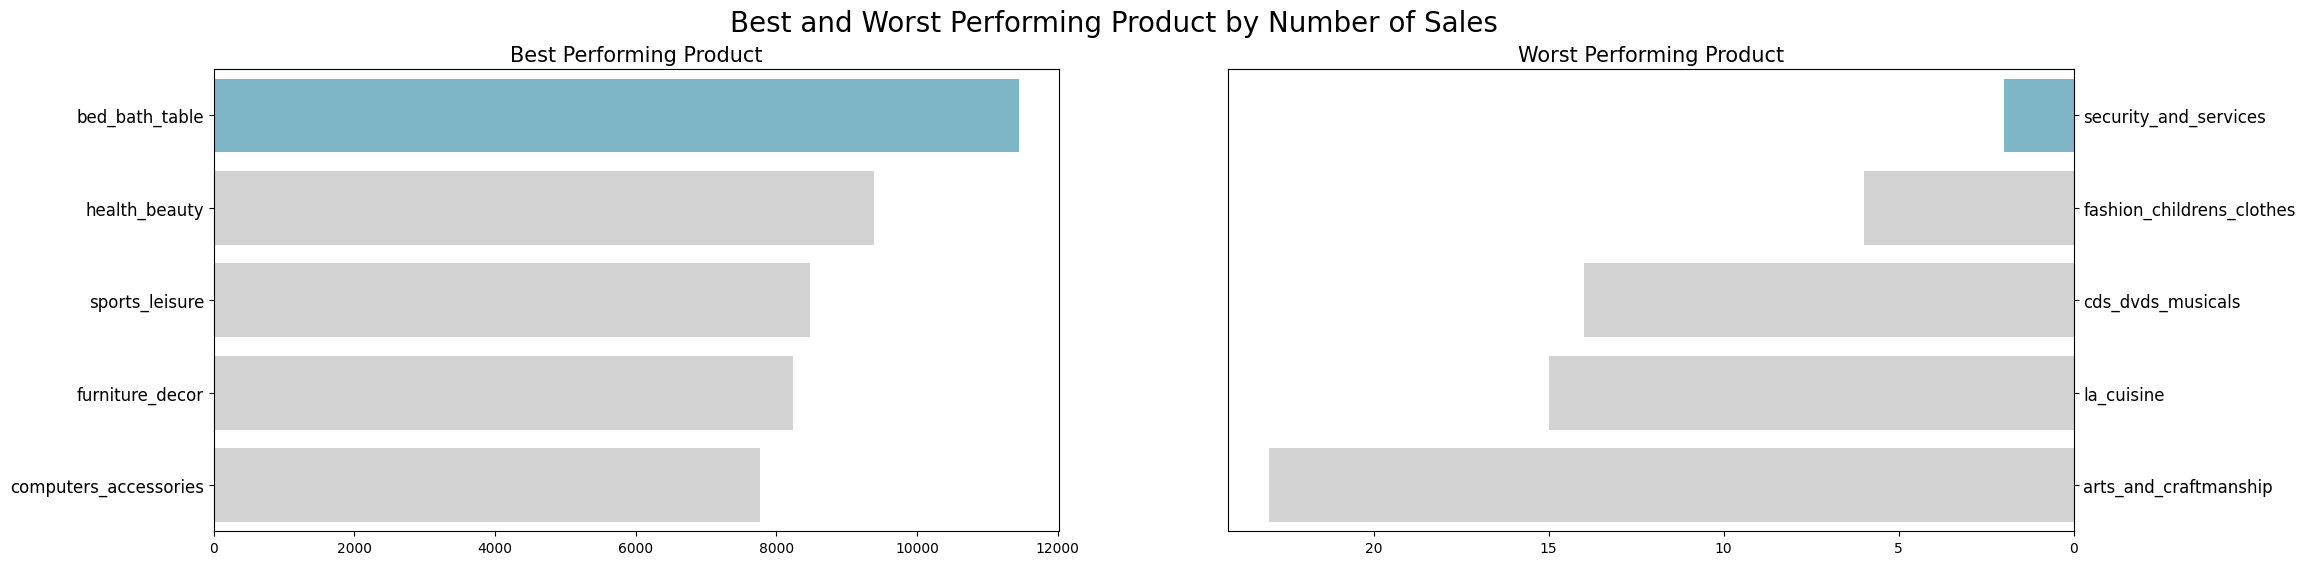

In [92]:
sum_order_items_df = product_penjualan.groupby('product_category_name').size().sort_values(ascending=False).reset_index(name='count')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="count", y="product_category_name", data=sum_order_items_df.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

In [110]:
monthly_orders_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "total_order",
    "payment_value": "total _payment"
}, inplace=True)
monthly_orders_df

,order_approved_at,total_order,total _payment
0,2016-10,249,58468.89
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,700,168848.89
4,2017-02,1611,320059.09
5,2017-03,2522,497306.56
6,2017-04,2261,447583.05
7,2017-05,3415,682657.64
8,2017-06,3012,565502.30
9,2017-07,3653,672403.71


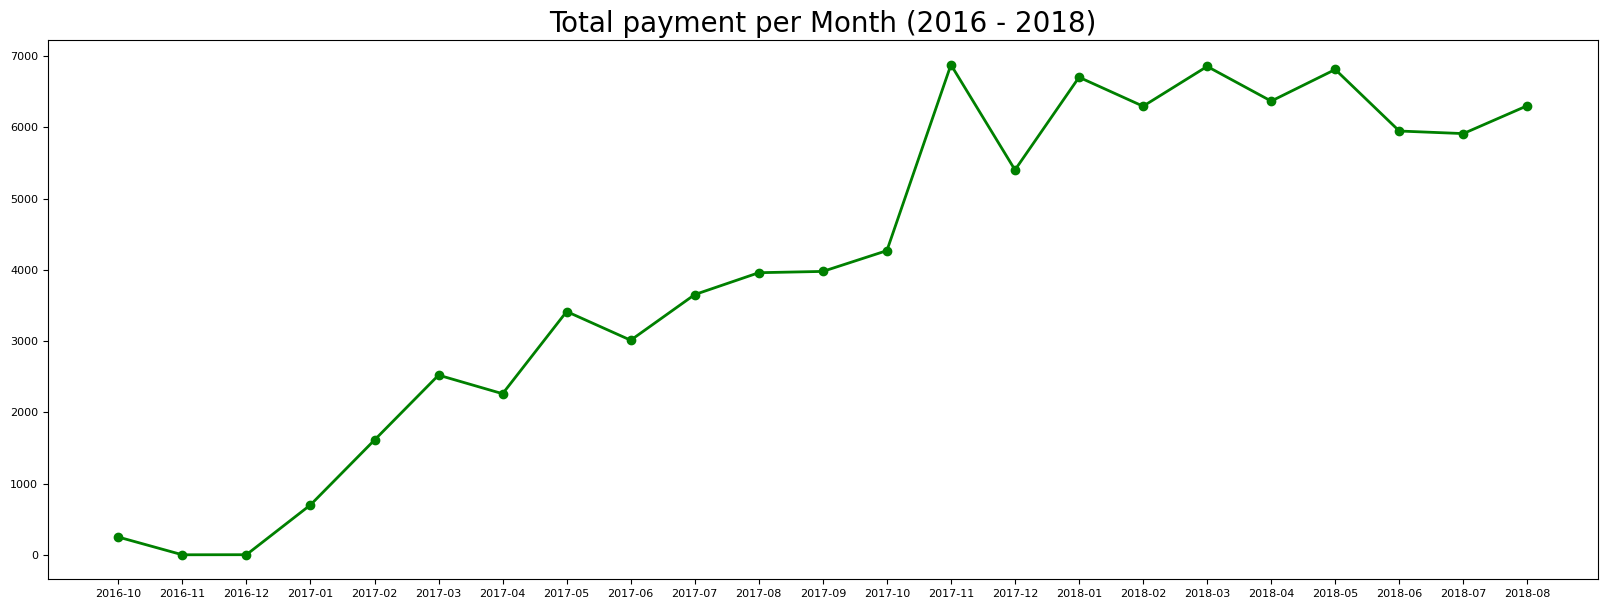

In [113]:
plt.figure(figsize=(20,7))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["total_order"],
    marker='o',
    linewidth=2,
    color="green"
)
plt.title("Total payment per Month (2016 - 2018)", loc="center", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [151]:
result_payment11 = all_data.groupby('payment_type').agg({
    "payment_value":  "sum"
})
result_payment11

,payment_value
payment_type,
boleto,3833198.27
credit_card,14731637.20
debit_card,236343.86
voucher,383632.91


In [161]:
payment_value = all_data.groupby("payment_type").payment_value.sum().sort_values(ascending=False).reset_index()
payment_value.head(15)

,payment_type,payment_value
0,credit_card,14731637.20
1,boleto,3833198.27
2,voucher,383632.91
3,debit_card,236343.86


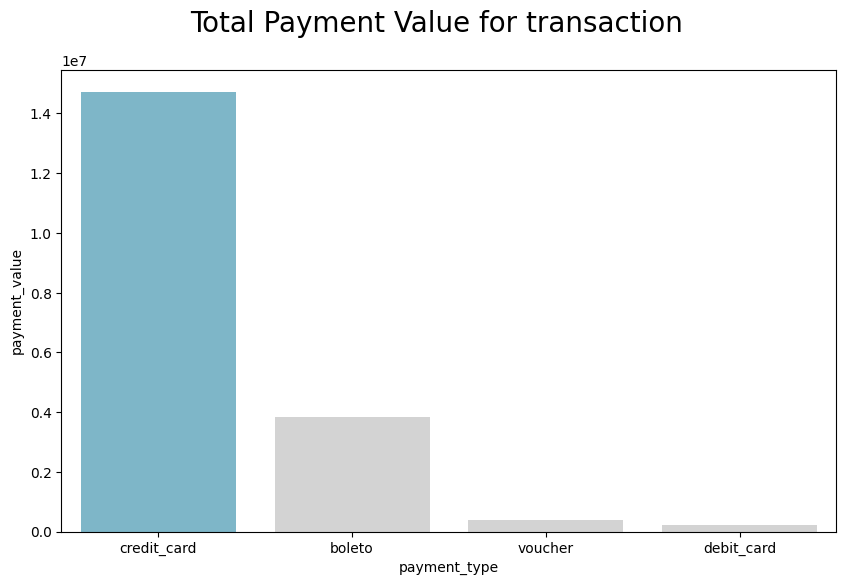

In [174]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="payment_type", y="payment_value", data=payment_value, palette=colors)
plt.suptitle("Total Payment Value for transaction", fontsize=20)
plt.show()

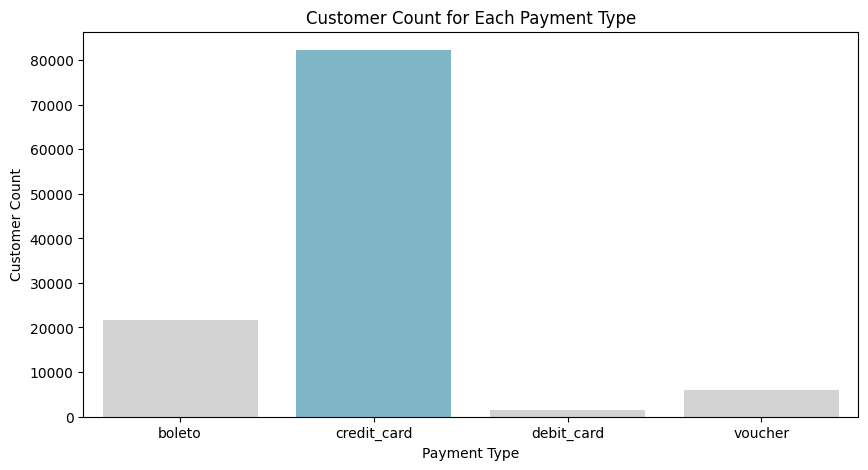

In [158]:
payment_type = all_data.groupby('payment_type').size().reset_index(name='count')
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="payment_type", y="count", data=payment_type, palette=colors_)
plt.xlabel("Payment Type")
plt.ylabel("Customer Count")
plt.title("Customer Count for Each Payment Type")
plt.show()

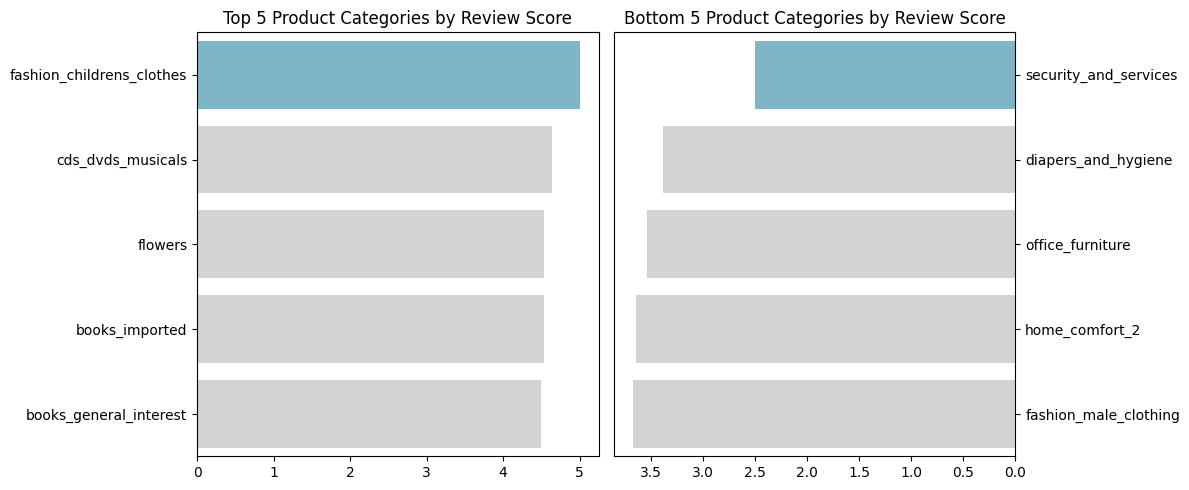

In [223]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot the bar chart in the first subplot

# Plot the bar chart in the first subplot (top 5 product categories by review score)
top_5_categories = all_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).reset_index(name='mean').head(5)

sns.barplot(x='mean', y='product_category_name', data=top_5_categories, palette=colors, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_xlabel(None)
axs[0].set_title("Top 5 Product Categories by Review Score")

# Plot the bar chart in the second subplot (bottom 5 product categories by review score)
bottom_5_categories = pie_chart = all_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=True).reset_index(name='mean').head(5)
sns.barplot(x='mean', y='product_category_name', data=bottom_5_categories, palette=colors, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].invert_xaxis()
axs[1].set_title("Bottom 5 Product Categories by Review Score")

plt.tight_layout()
plt.show()

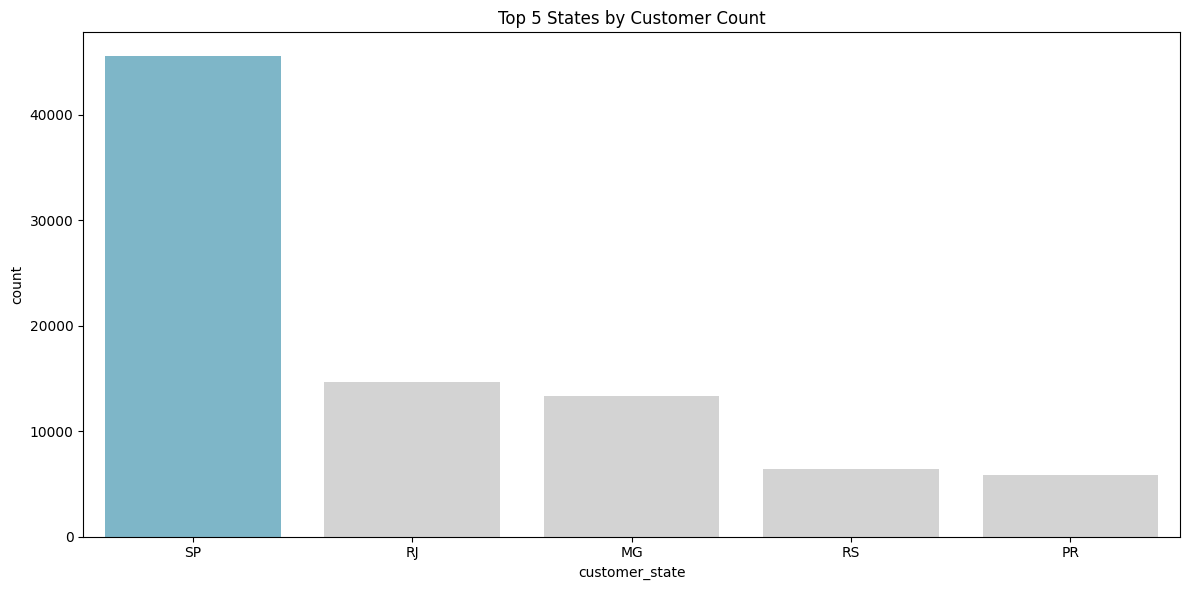

In [231]:
top_5_state = all_data.groupby('customer_state').size().sort_values(ascending=False).reset_index(name='count').head(5)

# Assuming you have a DataFrame 'payment_type' with columns 'payment_type' and 'count'
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Create pie chart
fig, axs = plt.subplots(figsize=(12, 6))
sns.barplot(x='customer_state', y='count', data=top_5_state, palette=colors)
plt.title("Top 5 States by Customer Count")

plt.tight_layout()
plt.show()

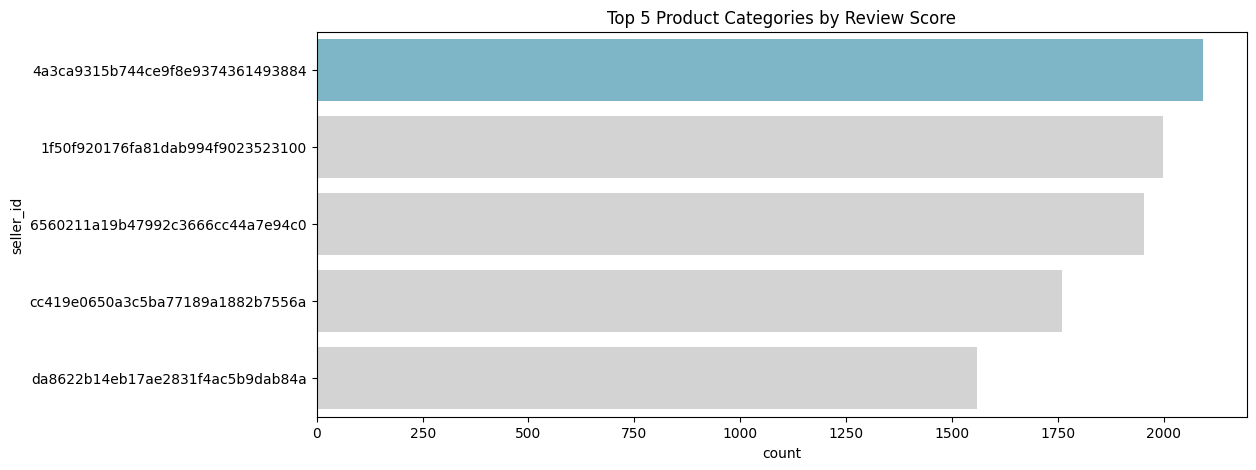

In [235]:
fig, axs = plt.subplots(figsize=(12, 5))
# Plot the bar chart in the first subplot

# Plot the bar chart in the first subplot (top 5 product categories by review score)
top_5_categories = all_data.groupby('seller_id').size().sort_values(ascending=False).reset_index(name='count').head(5)

sns.barplot(x='count', y='seller_id', data=top_5_categories, palette=colors)
plt.title("Top 5 seller")
plt.show()

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

In [ ]:
!pip install streamlit babel